In [1]:
#Tyler Ram
#10-18-2022
#http://www.wthtjsjs.cn/gallery/23-whjj-july-5556.pdf

In [11]:
#sourced from the first tutorial: https://qiskit.org/documentation/intro_tutorial1.html
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from numpy.random import randint
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [7]:
###########################################
##      Perform step 1
###########################################
output = np.random.randint(16)
print(output)

1


┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

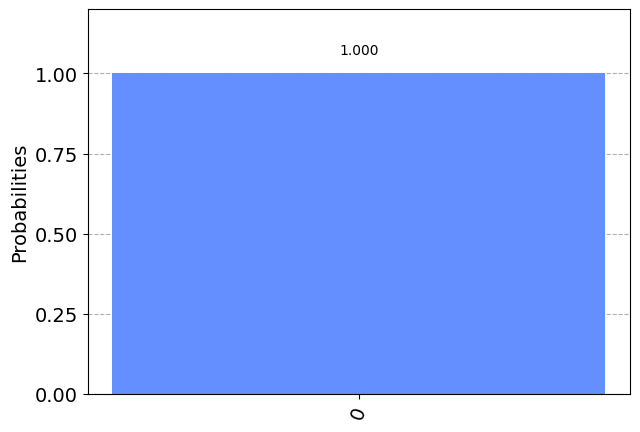

In [8]:
#Basic example of sending a message from Alice to Bob and having it be measured without interception

qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Alice now sends the qubit to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

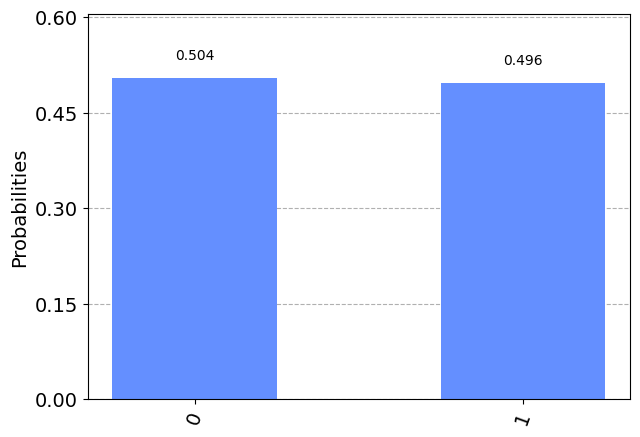

In [9]:
#Basic example of a message being intercepted

qc = QuantumCircuit(1,1)
# Alice prepares qubit in state |+>
qc.h(0)
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eve then passes this on to Bob
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

In [50]:
#Step one is to create an array of bits to send to Bob
def create_alice_bits(n):
    n = int(input())
    alice_bits = randint(2, size=n)
    return alice_bits

#Then we make another array of the same length to create the basis states for alice to encode the message
#Step one is to create an array of bits to send to Bob
def create_alice_bases(n):
    n = int(input())
    alice_bases = randint(2, size=n)
    return alice_bases

In [51]:
create_alice_bits(n)

100


array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [64]:
#Step one is to create an array of bits to send to Bob
def create_eve_bits(n):
    n = int(input())
    eve_bits = randint(2, size=n)
    return eve_bits

def create_eve_bases(n):
    n = int(input())
    eve_bases = randint(2, size=n)
    return eve_bases

In [66]:
create_alice_bases(n)
create_eve_bases(n)

100
100


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [137]:
def alice_encode(bits,bases):
    alice_encode_vec = []
    if len(bits)==len(bases):
        for i in range(len(bases)):
            #create basis vectors
            qc = QuantumCircuit(1,1)
            if bases[i] == 0:
                if bits[i] == 0:
                    pass
                else:
                    qc.x(0)
            else:
                if bits[i] == 0:
                    qc.h(0)
                else:
                    qc.x(0)
                    qc.h(0)
            alice_encode_vec.append(qc)
    else:
        printf("please correct bits and basis vectors")
    return  qc.draw()
            

In [144]:
create_encoding = alice_encode(create_alice_bits(n),create_alice_bases(n))
print(create_encoding)

2
2
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               


In [161]:
def measure_alice_encoding(create_encoding,bases):
    alice_measurements = []
    for i in range(len(bases)):
        #measure in x basis
        if bases[i] == 0:
            qc.measure(0,0)
        else:
            #measure in z basis
            qc.h(0)
            qc.measure(0,0)
    
        svsim = Aer.get_backend('aer_simulator')
        qobj = assemble(qc)
        result = svsim.run(qobj).result()
        output = plot_histogram(result.get_counts())
    return output

100


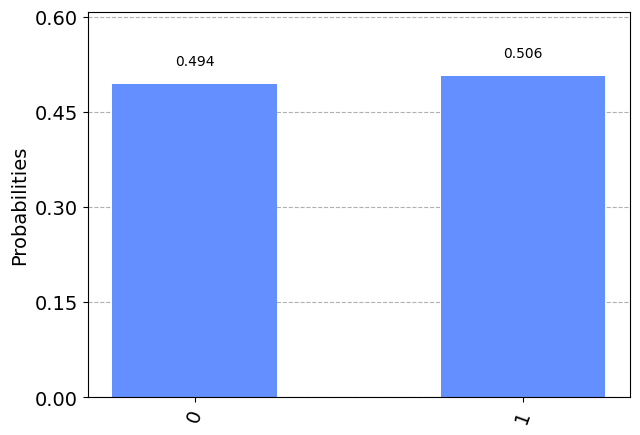

In [163]:
measure_alice_encoding(create_encoding=create_encoding,bases=create_alice_bases(n))

# def main(n,eve_present=False):
    
    #Step 1 prep alice
    create_alice_bits(n)
    create_alice_bases(n)
    #Step 2 send alice
    alice_encode_and_send(n)
    
    if eve_present=True
        eve_recieve(n)
    else
        pass
    

In [ ]:
def main(n,eve_listening=True):
    create_alice_bits(n)
    create_alice_bases(n)
    alice_encode(n)

In [62]:
main(n)

100
100


In [24]:
#Four basis states for possible types of communications in the protocal

0 0 -> |0>
0 1 -> |1>
1 0 -> |0> + |1>
1 1 -> |0> - |1>

In [63]:
#Code def for encoding
#code for alice prepraring her stuff
#code for alice sending her basis and bits
#code for eve being present
eve_basis = generate_random_bits(N)
eve = quantum_user("Eve")
eve_bits = eve.receive(data=alice_qubits,basis=eve_basis)
alice_qubits = eve.send(data=eve_bits,basis=eve_basis)
bob_basis = generate_random_bits(N)
bob = quantum_user("Bob")
bob_bits = bob.receive(data=alice_qubits,basis=bob_basis)
alice_key = list()
bob_key = list()

In [ ]:
#Code class recieve